# Sparse Hebbian Learning with Histogram Equalization Homeostasis : testing with different learning rates

In this notebook, we test the convergence of SparseNet as a function of different learning parameters. This shows the relative robusteness of this method according to the coding parameters, but also the importance of homeostasis to obtain an efficient set of filters.

It uses the full homeostasis layer (by setting ``alpha_homeo=0.``) - to be compared to a smoother Olshausen-like homeostasis.

See also :
* http://blog.invibe.net/posts/2015-05-05-reproducing-olshausens-classical-sparsenet.html for a description of how SparseNet is implemented in the scikit-learn package
* http://blog.invibe.net/posts/2015-05-06-reproducing-olshausens-classical-sparsenet-part-2.html for a descrtiption of how we managed to implement the homeostasis

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=2, suppress=True)
from copy import deepcopy

In [2]:
from shl_scripts.shl_experiments import SHL_set
tag = 'HEH'
opts = dict(homeo_method=tag, eta_homeo=0.01, alpha_homeo=0.8, C=5., nb_quant=128, P_cum=None, verbose=0)
opts = dict(homeo_method=tag, P_cum=None, verbose=0)
experiments = SHL_set(opts, tag=tag)
list_figures = []
list_figures = ['show_dico']
display_variables = ['error', 'logL', 'cputime']

In [3]:
!ls -l {experiments.shl.data_cache}/{tag}*

ls: cannot access 'data_cache/HEH*': No such file or directory


## different learning rates

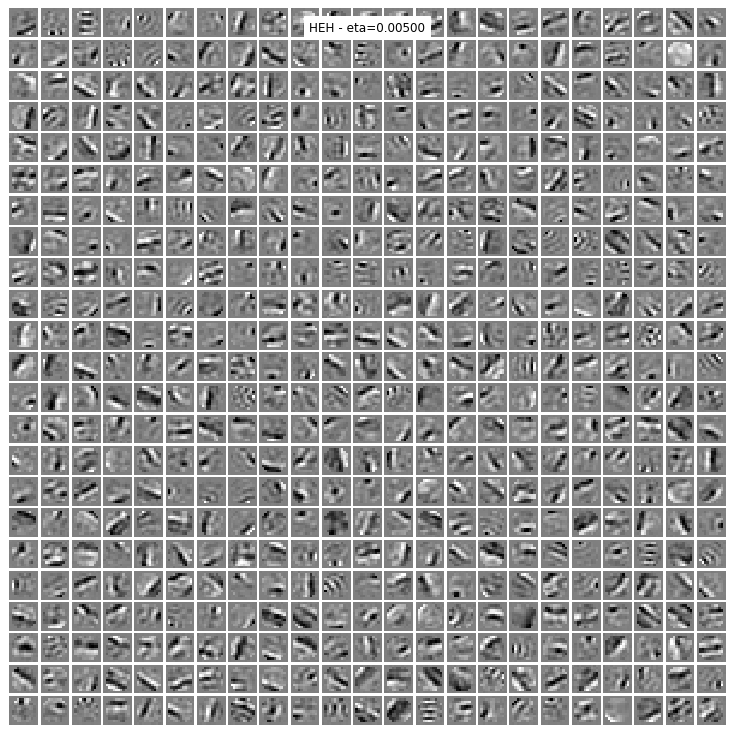

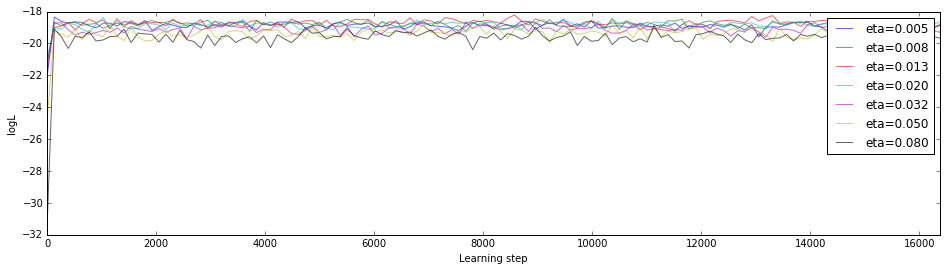

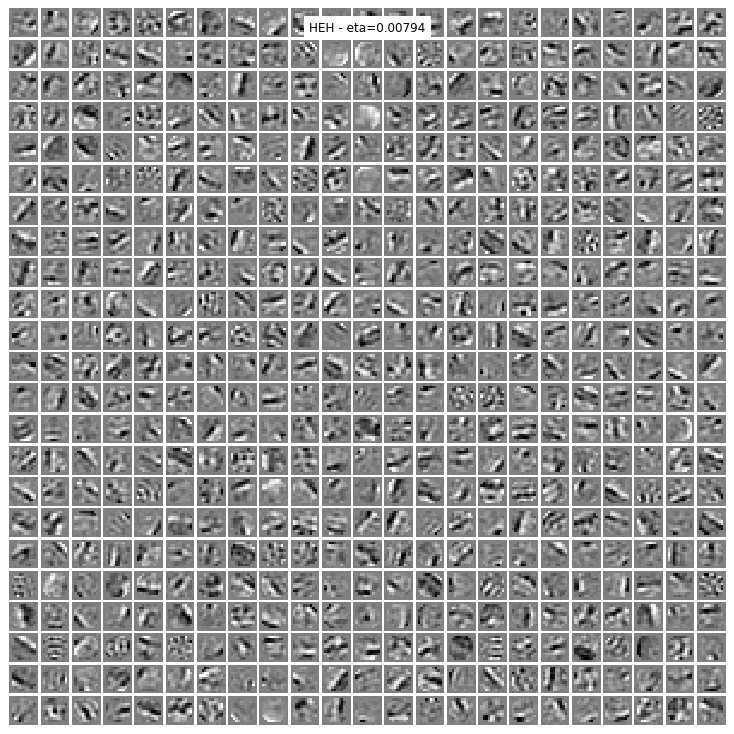

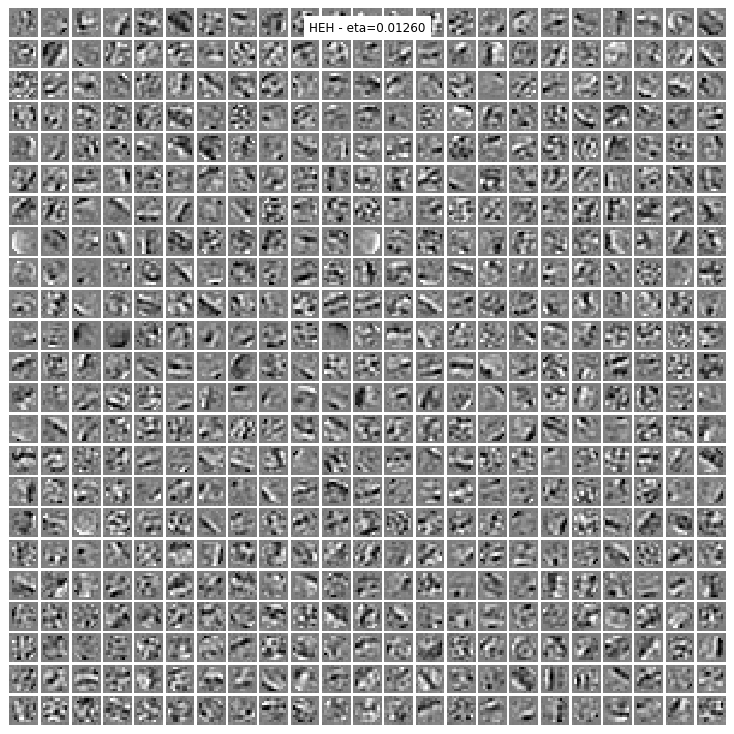

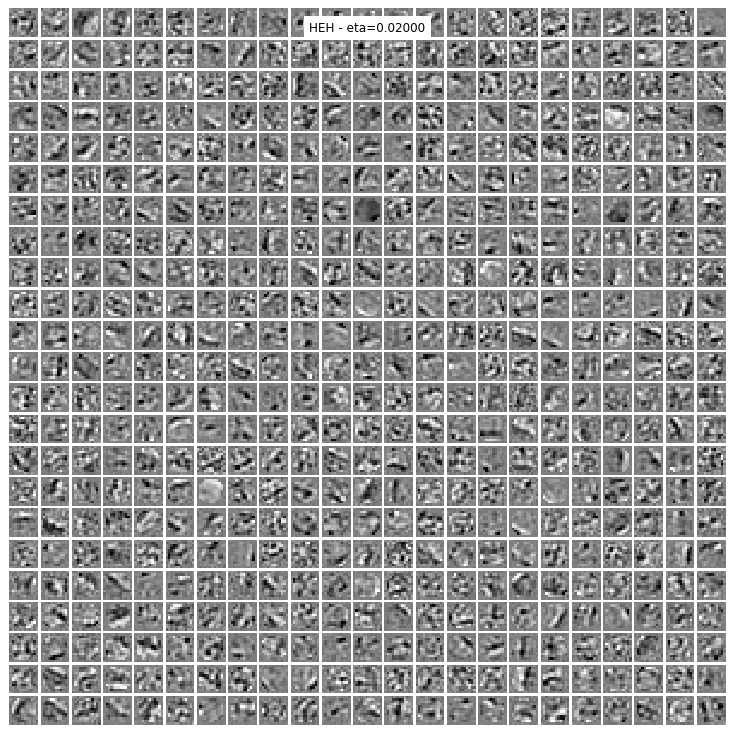

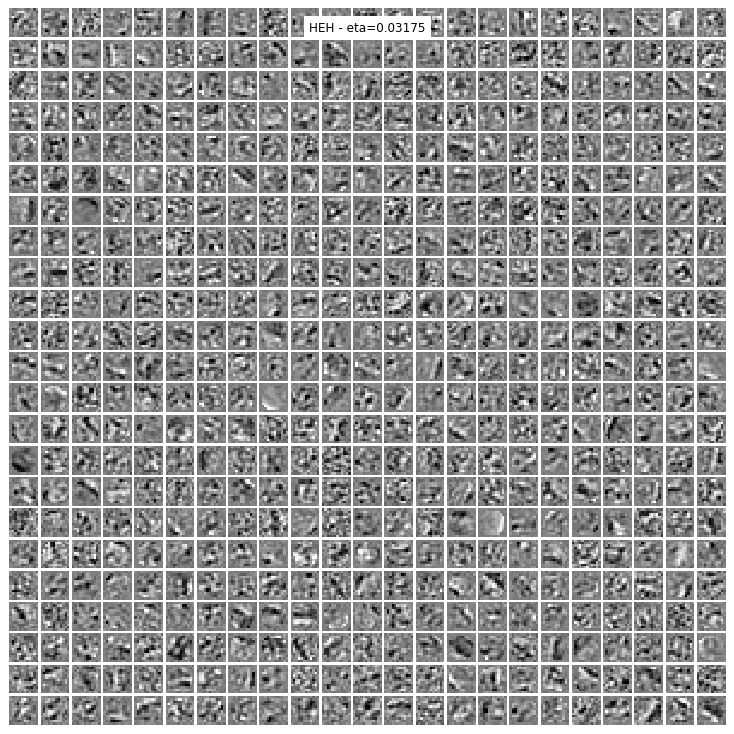

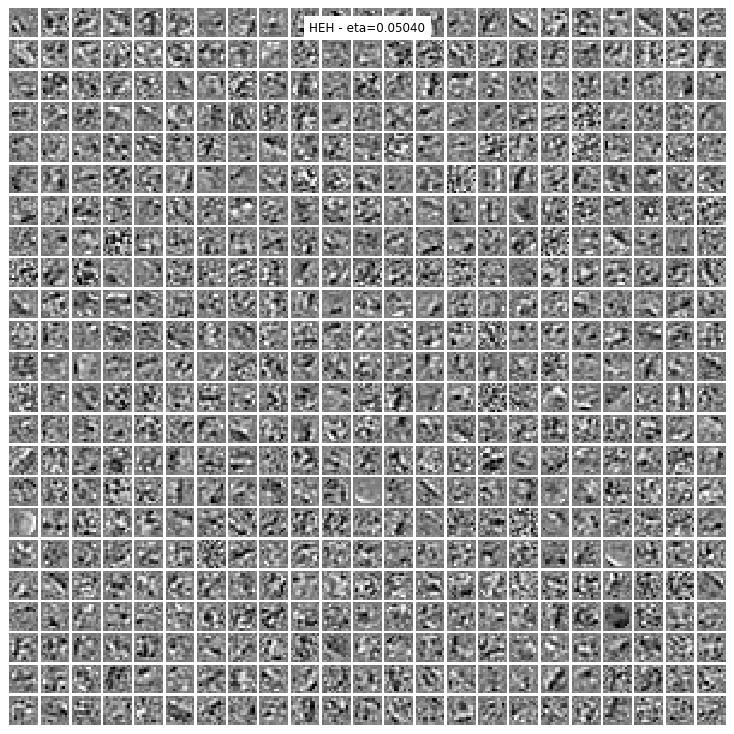

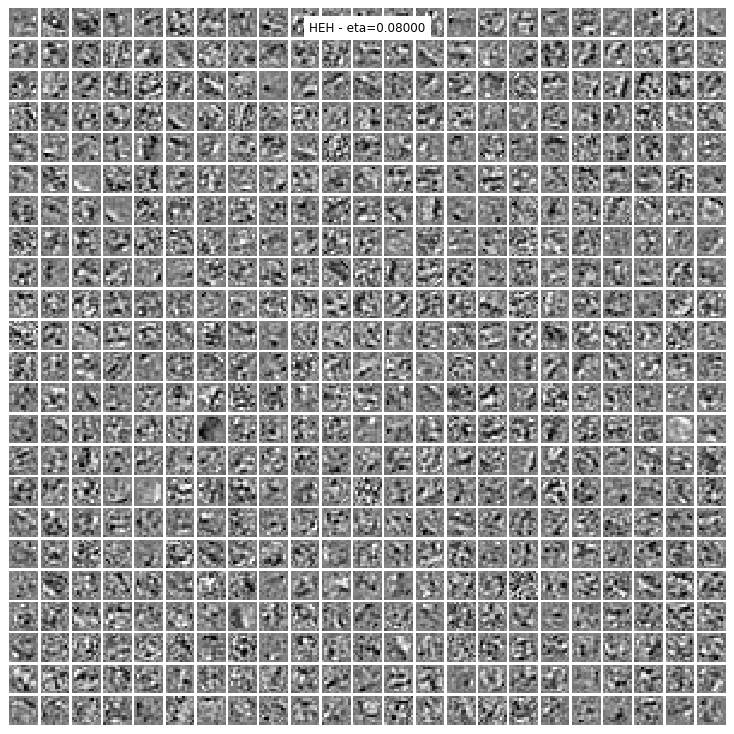

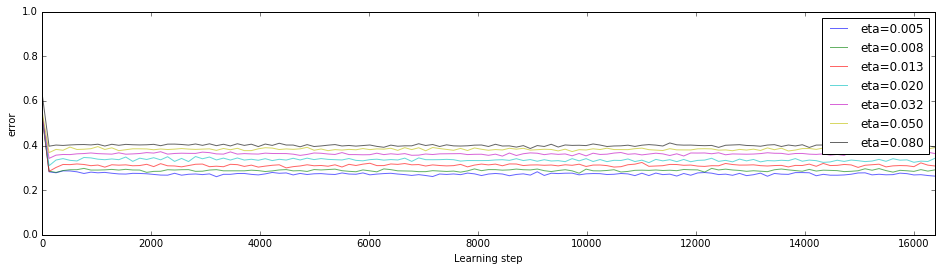

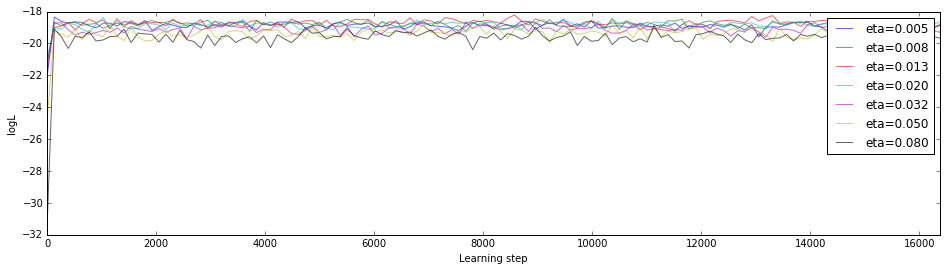

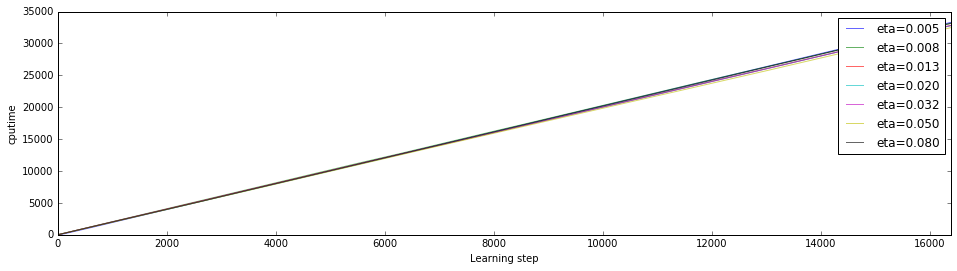

In [4]:
experiments.scan(variable='eta', list_figures=list_figures, display='dynamic')
for display_variable in display_variables:
    fig, ax = experiments.scan(variable='eta', list_figures=[], display='dynamic', display_variable=display_variable)

## different homeostatic learning rates

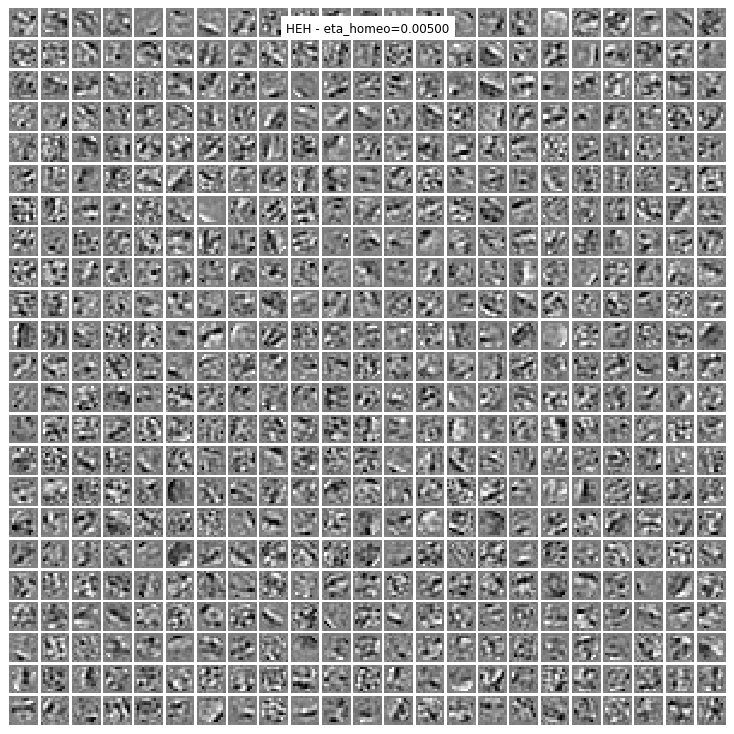

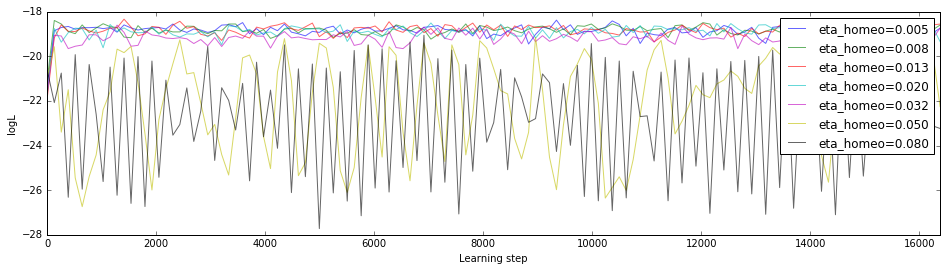

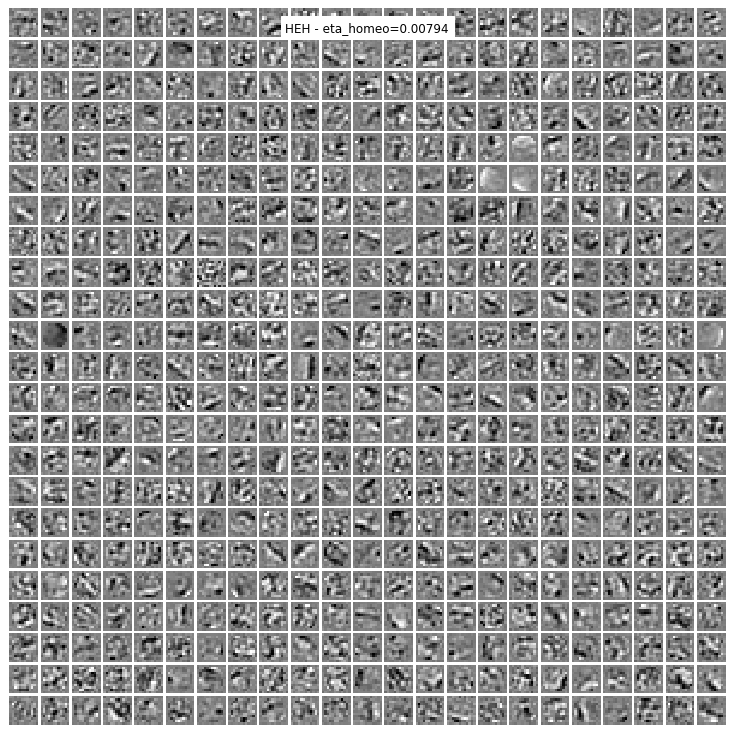

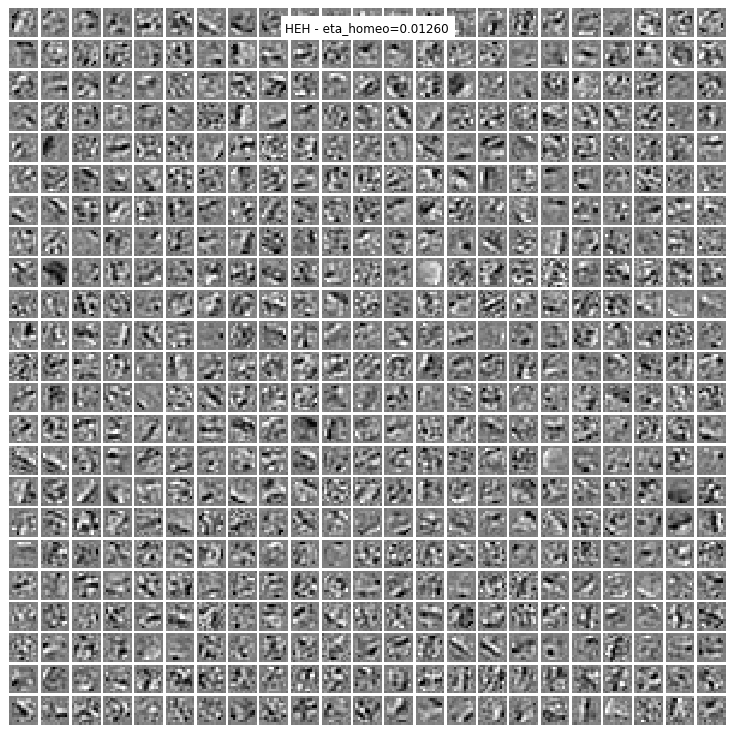

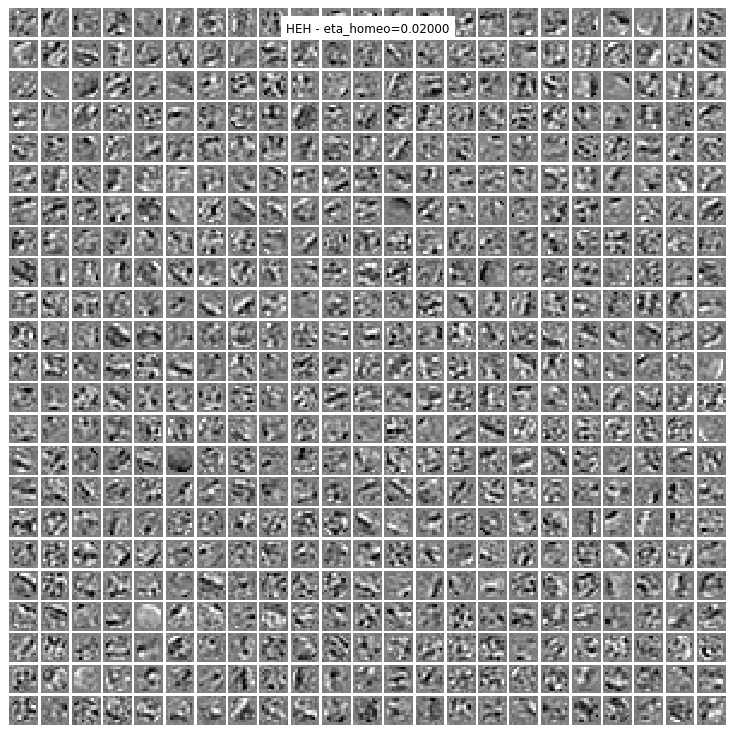

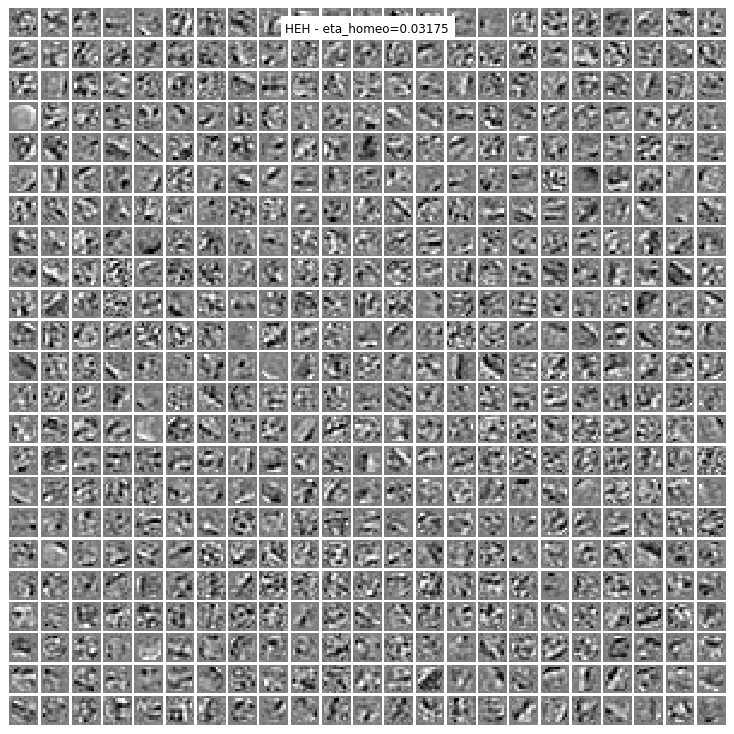

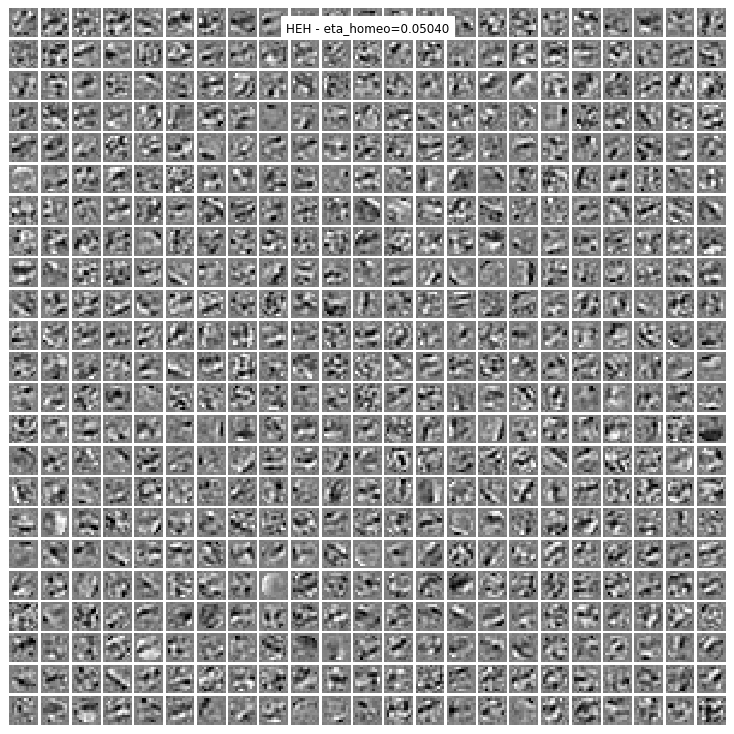

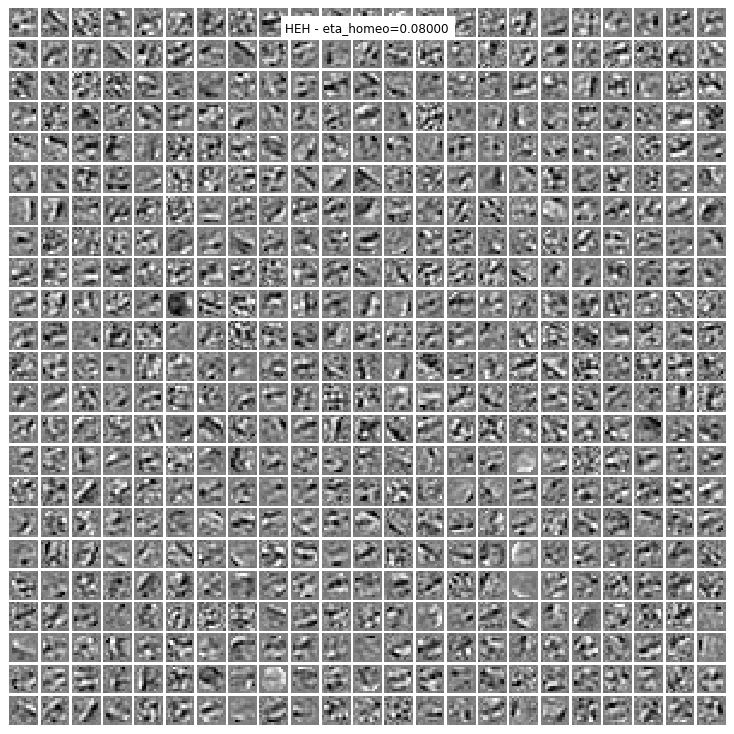

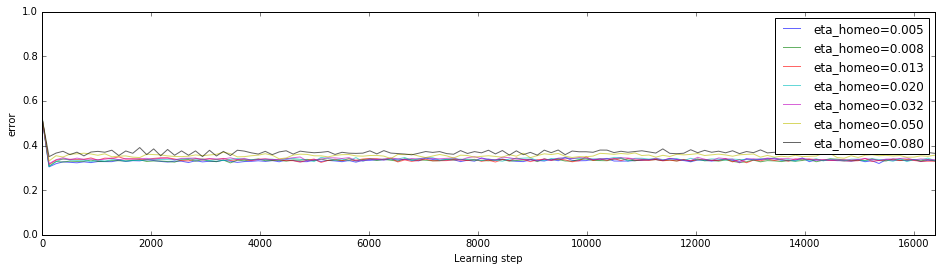

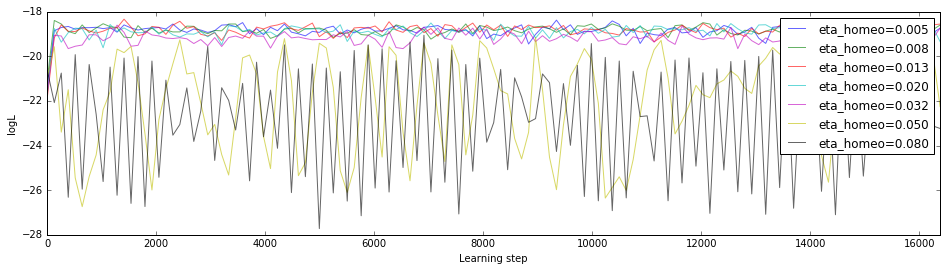

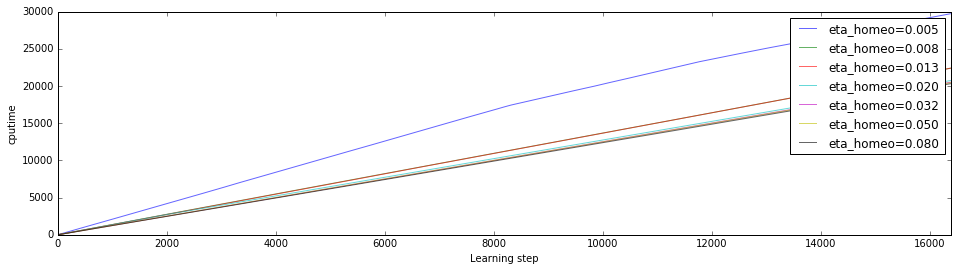

In [ ]:
experiments.scan(variable='eta_homeo', list_figures=list_figures, display='dynamic')
for display_variable in display_variables:
    fig, ax = experiments.scan(variable='eta_homeo', list_figures=[], display='dynamic', display_variable=display_variable)

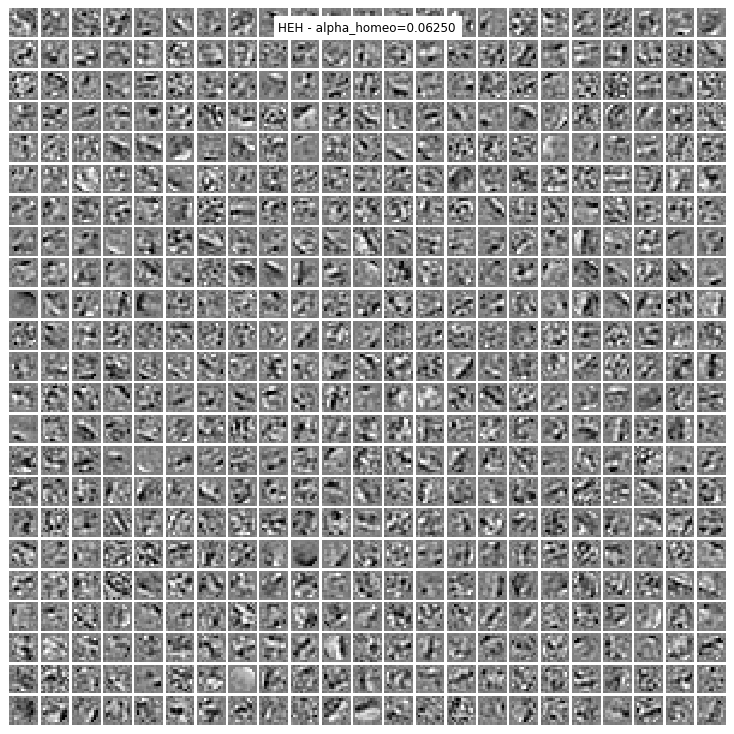

In [ ]:
experiments.scan(variable='alpha_homeo', list_figures=list_figures, display='')
for display_variable in display_variables:
    fig, ax = experiments.scan(variable='alpha_homeo', list_figures=[], display='dynamic', display_variable=display_variable)

## different sparseness

In [ ]:
experiments.scan(variable='l0_sparseness', base=4, list_figures=list_figures, display='')

for display_variable in display_variables:
    fig, ax = experiments.scan(variable='l0_sparseness', base=4, list_figures=[], display='dynamic', display_variable=display_variable)

## Version used

In [ ]:
%load_ext version_information

In [ ]:
%version_information numpy, shl_scripts